# Charged interactions

In addition to the van der Waals interactions, to model *real* chemical systems, it is also important to consider the interactions between charged species. 
Charged interactions are models using Coulomb's law [[1, 2](#references)], 

$$ E_{\text{Coulomb}}(r) = \frac{1}{4\pi\varepsilon_0}\frac{q_iq_je^2}{r^2}, $$ 

where, $q_i$ and $q_j$ are the electronic charge on the particles, $e$ is the charge of the electron, $\varepsilon_0$ is the dielectric permitivity of vacuum, and $r$ is the distance between the two point particles. 

The Python code below defines a function that models the electrostatic interaction using Coulomb's law and plots it.

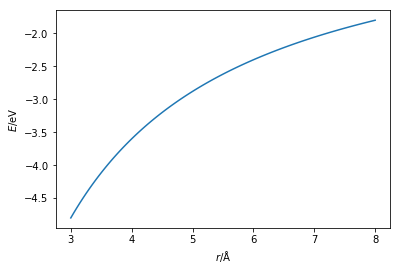

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, epsilon_0

def coulomb_energy(qi, qj, rij):
    """
    Calculation of Coulomb's law.
    
    Parameters
    ----------
    qi: float
        Electronic charge on particle i
    qj: float
        Electronic charge on particle j
    rij: float 
        Distance between particles i and j
        
    Returns
    -------
    float
        Energy of the Coulombic interaction
    """
    return (qi * qj * e ** 2) / (4 * np.pi * epsilon_0 * r * 1e-10) / 1.602e-19

r = np.linspace(3, 8, 100)
plt.plot(r, coulomb_energy(1, -1, r))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.show()

The above code and plot can be thought of as the interaction between a sodium ion (Na<sup>+</sup>) and a chloride ion (Cl<sup>-</sup>).
These ions have opposite charges and therefore will be very strongly attracted to each other.
However, ofcourse there is also a van der Waals interaction present for the interaction between oppositely charged ions. 
This means that the total potential energy for the Na<sup>+</sup> and Cl<sup>-</sup> interaction it is necessary to consider the sum of the van der Waals interaction (modelled with the Lennard-Jones potential model) and the charged interaction (modelled with Coulomb's law). 

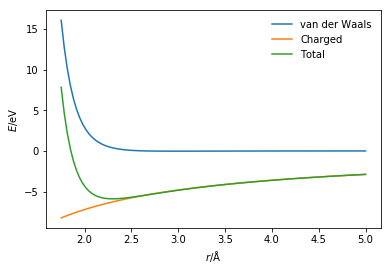

In [23]:
def attractive_energy(r, epsilon, sigma):
    """
    Attractive component of the Lennard-Jones interaction
    energy.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of attractive component of Lennard-Jones 
        interaction
    """
    return -4 * epsilon * np.power(sigma / r, 6)

def repulsive_energy(r, epsilon, sigma):
    """
    Repulsive component of the Lennard-Jones interaction
    energy.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of repulsive component of Lennard-Jones 
        interaction
    """
    return 4 * epsilon * np.power(sigma / r, 12)

def lj_energy(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of the van der Waals interaction
    """
    return repulsive_energy(r, epsilon, sigma) + attractive_energy(r, epsilon, sigma)

r = np.linspace(1.75, 5, 100)
plt.plot(r, lj_energy(r, 0.0301, 2.65), label='van der Waals')
plt.plot(r, coulomb_energy(1, -1, r), label='Charged')
plt.plot(r, lj_energy(r, 0.0301, 2.65) + coulomb_energy(1, -1, r), 
         label='Total')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.legend(frameon=False)
plt.show()

## References

1. Coulomb, C. A. *Histoire de l’Académie Royale des Sciences* 1788, 569–577.
2. Coulomb, C. A. *Histoire de l’Académie Royale des Sciences* 1788, 578–611.